In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# We read a dataset with weather data from The Netherlands
df = pd.read_csv('data/weather.csv')

In [2]:
# Ask for the shape of our dataset
# This returns the number of rows and columns
df.shape

(8784, 5)

In [3]:
# Ask for a more elaborate description of our data
# Including datatypes for each column, index type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
MONTH       8784 non-null int64
DAY         8784 non-null int64
TIME        8784 non-null int64
TEMP        8784 non-null float64
PRESSURE    8784 non-null int64
dtypes: float64(1), int64(4)
memory usage: 343.2 KB


In [6]:
# head() gets the first 5 rows
df.head()

# Or you can specify how many lines you want:
# df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


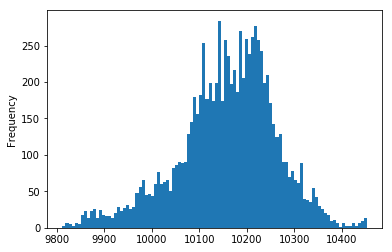

In [4]:
# tail() gets the last 5 rows
df.tail()

#for the temperature
df['PRESSURE'].plot.hist(bins=100)

In [ ]:
# Describe gives a statistical overview of our data
df.describe()

In [ ]:
# mean() calculates the mean per column
df.mean()

In [ ]:
# max() calculates the maximum per column
df.max()

In [ ]:
# These types of functions can also be called on a single column
# Here we calculate the minimum value in the pressure column
df['PRESSURE'].min()

In [ ]:
# mode() returns the most occurring value in the column
df['TEMP'].mode()

In [ ]:
# plotting a column is very easy
df['TEMP'].plot()

# There are several types of plot we can make
# This example shows a histogram

In [ ]:
# Describe gives a statistical overview of our data
df.describe()

In [ ]:
# mean() calculates the mean per column
df.mean()

In [ ]:
# max() calculates the maximum per column
df.max()

In [ ]:
# These types of functions can also be called on a single column
# Here we calculate the minimum value in the pressure column
df['PRESSURE'].min()

In [ ]:
# mode() returns the most occurring value in the column
df['TEMP'].mode()

In [ ]:
# plotting a column is very easy
df['TEMP'].plot()

In [ ]:
# There are several types of plot we can make
# This example shows a histogram for the temperature
df['TEMP'].plot.hist(bins=100)

In [ ]:
# Detecting Missing Values

import numpy as np
import pandas as pd

df = pd.read_csv('weather_m4.csv')
df.info()

df[['MIN_TEMP_GROUND', 'VIEW_RANGE', 'CLOUD', 'WEATHER_CODE']].head(15)

In [ ]:
# Show all columns with null values
df.isnull().any()

In [ ]:
# Show all rows with null values
df[df.isnull().any(axis=1)]

In [ ]:
# Are there any rows with only null values?
df.isnull().all(axis=1).any()

In [ ]:
# Are there any columns with no null values at all?
df.notnull().all()

In [ ]:
# Hmm.. seems like this column only has a value every 6th row.. let's check this
df['MIN_TEMP_GROUND']

In [ ]:
# Create a series containing indices for every 6th row
every_6th_row = pd.Series(range(5, len(df), 6))

In [ ]:
# Are all these rows NOT null?
df['MIN_TEMP_GROUND'][every_6th_row].notnull().all()

In [ ]:
# Are all other rows null?
# Q: Can you rewrite this line to use df.loc?
df['MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all()

In [ ]:
# Handling Missing Values
df.info()

In [ ]:
# df.drop can be used to remove columns and/or rows
df.drop(columns='WEATHER_CODE', inplace=True)

In [ ]:
# We can use fillna() to fill in missing data based on the data that is present
df['MIN_TEMP_GROUND'].fillna(method='bfill', inplace=True)

In [ ]:
# Now that we have no more nulls in MIN_TEMP_GROUND
# what are the dates where missing values occur?
df.loc[df.isnull().any(axis=1), 'YYYYMMDD'].drop_duplicates()

In [ ]:
# Shortest solution: Just drop everything
nulls_dropped = df.dropna()
nulls_dropped.info()

In [ ]:
# But note that our index is now discontinuous
nulls_dropped[5300:5310]

In [ ]:
# Another idea: just drop rows that have less than 7 columns filled
# This leaves us with only two rows that contain null values
drop_thresh = df.dropna(thresh=7)
drop_thresh[drop_thresh.isnull().any(axis=1)]

In [ ]:
# Or let's just look at the missing data again..
rows_to_fill = df.isnull().any(axis=1)
df[rows_to_fill]

In [ ]:
# We might fill all null values with the mean of the corresponding column
nulls_filled = df.fillna(df.mean())

In [ ]:
# Let's look at the result
nulls_filled[rows_to_fill]

In [ ]:
# Or you could fill the null values with the mode
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# Removing Outliers

athletes = pd.read_csv('athletes.csv')
athletes.info()

% matplotlib inline
athletes.plot.scatter(x='height', y='weight')

heights = athletes['height']
heights.plot.box()

In [ ]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1 
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
nwh = heights.where(heights.between(pmin, pmax))

compare = pd.DataFrame({'before':heights, 'after':nwh})
compare.plot.box()
compare.describe()

heights.where(heights.between(pmin, pmax), inplace=True)

athletes.plot.scatter(x='height', y='weight')

In [ ]:
# Removing Duplicates

athletes.duplicated().any()

athletes[athletes.duplicated()]

athletes.drop_duplicates(inplace=True)

athletes['nationality'].drop_duplicates().sort_values()

athletes['nationality'].value_counts()

athletes['sex'].value_counts()

In [ ]:
# Converting Types

athletes.info()

athletes[['gold', 'silver', 'bronze']].head()

athletes[athletes['gold'] == 'O']

athletes.loc[7521, ['gold', 'silver', 'bronze']] = 0

athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int)

athletes[['gold', 'silver', 'bronze']].sum()

athletes.info()

In [ ]:
# Fixing Indexes

athletes.head()

athletes.set_index('id', drop=True, inplace=True)
athletes.head()

athletes.rename(
    columns={"nationality": "country", "sport": "discipline"}, 
    inplace=True)
athletes.head()

df = pd.read_csv('weather_m4.csv')

df.dropna(inplace=True)
df.info()

df.head()

df.reset_index(drop=True)

In [ ]:
# Mathematical Operations

import numpy as np
import pandas as pd

df = pd.DataFrame(np.ones([5,4]), columns=['a', 'b', 'c', 'd'])
df

# Basic math operations on a DataFrame perform the computation for every cell
df *= 2
df

# You can also do calculations on specific rows or columns
df.loc[1] /= 2
df['b'] -= 1
df

df2 = pd.DataFrame(np.ones([3,2]), columns=['d', 'e'], index=[2,4,5])
df2

# Operating on two DataFrames:
# NaN for every combination of index/column that is not present in both inputs
df + df2

# The same is true for operations on two Series
df.loc[2] * df2.loc[5]

df.mean()

# This is an operation on a DataFrame and a Series
# Series indices are matched on DataFrame column labels
df - df.mean()

# Another operation on DataFrame and Series
# Here, again, we see that we get NaN if labels are not present in both inputs
df - pd.Series({'a':5, 'b':5, 'e':5, 'f': 5})

# Normal math operators cannot get an axis argument
# To do this, there are functions for every math operator
df.sub( df.mean(axis=1), axis=0)

# Function Application

df = pd.DataFrame({'sin': np.arange(0, 5*np.pi, 0.01), 
                   'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})

# Numpy ufuncs like np.sin operate on every cell
# Here we compute the sin for every cell in the dataframe
df = np.sin(df)

% matplotlib inline
df.plot()

def iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    return q3 - q1 

# df.apply() executes the given function on a whole row or column
df.apply(iqr)

def somefunc(x):
    return np.abs(x+.25)

# df.applymap() applies the given function for every cell in the DataFrame
df.applymap(somefunc).plot()

## Groups and Aggregations with groupby()

athletes = pd.read_csv('athletes.csv')
athletes.info()

# Simply calling groupby returns a GroupBy object 
# This does not calculate anything yet!
g = athletes.groupby('nationality')[['gold', 'silver', 'bronze']]

# Calling an aggregation function on the GroupBy object
# applies the calculation for every group
# and constructs a DataFrame with the results
g.sum()

# We can select multiple columns to group by
# And we can select a subset of columns to do
g = athletes.groupby(['sport', 'sex'])[['weight', 'height']]

# Because we selected only 2 columns, this calculation will now be cheaper
g.mean()

# Reshaping Rows and Colums with stack() and unstack()

m = pd.read_csv('monthly_data.csv')
m

# Preparation: move the 'YYYY' column into the index
m.set_index('YYYY', inplace=True)
m

# stack() moves data from rows into a single column
m.stack()

# stack() also allows quick calculations over all cells
m.stack().sum()

w = athletes.groupby(['sport', 'sex'])['weight'].mean()
w

# unstack() takes the inner index level and creates a column for every unique index
# It then moves the data into these columns
w.unstack()

# Reshaping Rows and Colums with pivot()

p = pd.DataFrame({'id': [823905, 823905,
                         235897, 235897, 235897,
                         983422, 983422],
                  'item': ['prize', 'unit', 
                           'prize', 'unit', 'stock', 
                           'prize', 'stock'],
                  'value': [3.49, 'kg',
                            12.89, 'l', 50,
                            0.49, 4]})
p

# pivot() moves data from rows into columns
# so that we end up with a wider, shorter DataFrame

# The first argument is the column that will be used for row indices
# The second argument is the column that will be used to create column labels
p.pivot('id', 'item')

grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades.reset_index(inplace=True)
grades

# melt() is the opposite of pivot()
# It moves the data from the rows into a single column
# The column names will show up in a new column called "variable"
grades.melt(id_vars=['index'])

# Combining Datasets

grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades

# Adding a new column -- needs an indexed datastructure (Series)
grades['test_4'] = pd.Series({'John': 5, 'Ann': 8, 'Pete': 9, 'Mary': 7, 'Laura': 10})
grades

# Adding a row with .loc -- no Series necessary
grades.loc['Bob'] = [2,3,4,5]
grades

# We can also use append
# But in that case we need a Series with a name (will be used as row index)
new_row = pd.Series({'test_1': 5, 'test_2': 6, 'test_3': 7, 'test_4': 8}, name="Kim")
grades.append(new_row)

grades['stud_nr'] = [113, 121, 123, 135, 139, 141]
grades = grades[['stud_nr', 'test_1', 'test_2', 'test_3', 'test_4']]
grades

other = pd.DataFrame([[139, 7, 7],
                       [123, 8, 6],
                       [142, 4, 5],
                       [113, 7, 9],
                       [155, 10, 9],
                       [121, 6, 4]], 
                       columns = ['stud_nr', 'exam1', 'exam2'])
other

# Merging two DataFrames
# By default this does an inner join on the common column (stud_nr)
grades.merge(other)

# We can also specify other join types: left, right, outer
grades.merge(other, how='outer')